In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# 参考认识  
 https://zhuanlan.zhihu.com/p/93423829  

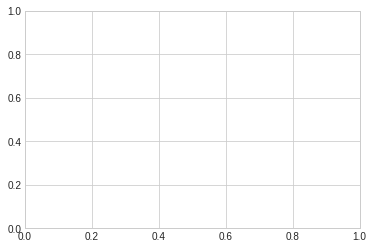

In [12]:
fig = plt.figure()  # 创建图形
ax = plt.axes()  # 创建维度

图形：类plt.Figure的一个实例，个包括所有维度、图像、文本和标签对象的容器。  
维度：类plt.Axes的一个实例，一个有边界的格子包括刻度和标签，以及画在上面的图表元素。


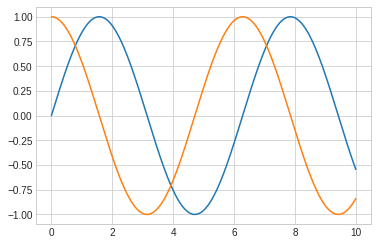

In [18]:
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));
plt.plot(x, np.sin(x));   #  pylab 接口（MATLAB 风格的接口）帮我们在后台自动创建这两个对象
plt.plot(x, np.cos(x));

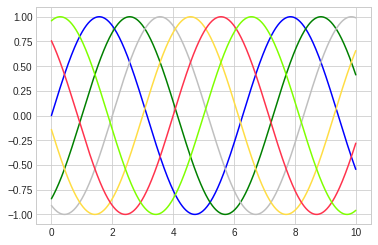

In [19]:
plt.plot(x, np.sin(x - 0), color='blue')        # 通过颜色名称指定
plt.plot(x, np.sin(x - 1), color='g')           # 通过颜色简写名称指定(rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # 介于0-1之间的灰阶值
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # 16进制的RRGGBB值
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB元组的颜色值，每个值介于0-1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # 能支持所有HTML颜色名称值

通过linestyle关键字参数可以指定线条的风格

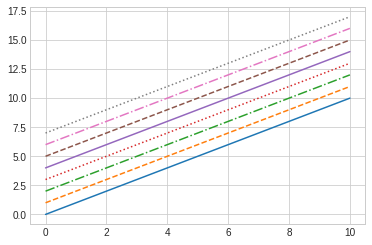

In [20]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# 还可以用形象的符号代表线条风格
plt.plot(x, x + 4, linestyle='-')  # 实线
plt.plot(x, x + 5, linestyle='--') # 虚线
plt.plot(x, x + 6, linestyle='-.') # 长短点虚线
plt.plot(x, x + 7, linestyle=':');  # 点线

linestyle和color参数能够合并成一个非关键字参数，传递给plt.plot()函数：

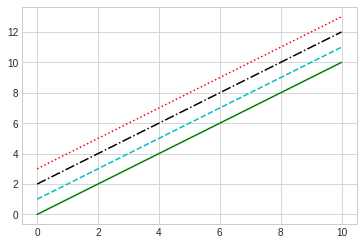

In [21]:
plt.plot(x, x + 0, '-g')  # 绿色实线
plt.plot(x, x + 1, '--c') # 天青色虚线
plt.plot(x, x + 2, '-.k') # 黑色长短点虚线
plt.plot(x, x + 3, ':r');  # 红色点线

x， y轴范围 xlim，axis等，后者一次传递横纵轴， plt.axis('tight')将图压缩到合适的大小  
plt.xlabel，plt.title，plt.legend等基本关键字

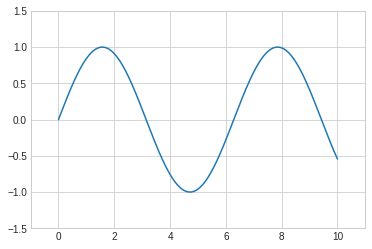

In [24]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);
# plt.plot(x, np.sin(x))
# plt.axis([-1, 11, -1.5, 1.5]);

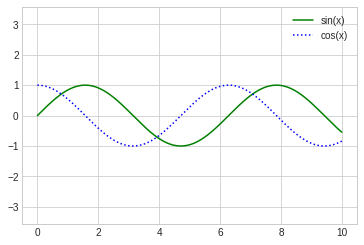

In [27]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();  # 显示对应的label

# matlab风格转面向对象的方
plt.xlabel() → ax.set_xlabel()  
plt.ylabel() → ax.set_ylabel()  
plt.xlim() → ax.set_xlim()  
plt.ylim() → ax.set_ylim()  
plt.title() → ax.set_title()  

面向对象方式有个好处，可以一次性设置所有属性：  
ax.set(**kwargs)

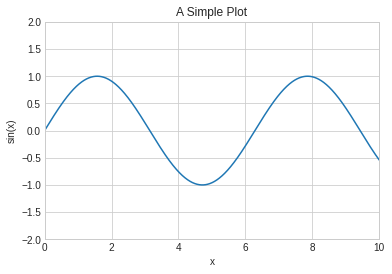

In [33]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# 散点图

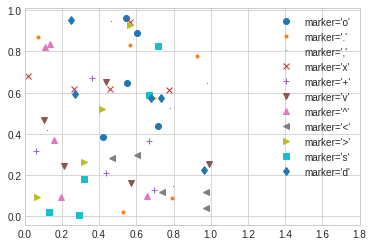

In [41]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);
# x = np.linspace(0, 10, 30)
# y = np.sin(x)
# plt.scatter(x, y, marker='o');

# plt.scatter和plt.plot的主要区别在于，plt.scatter可以针对每个点设置不同属性（大小、填充颜色、边缘颜色等），还可以通过数据集合对这些属性进行设置

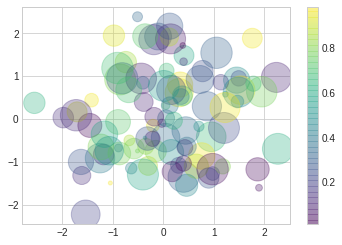

In [42]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # 显示颜色对比条

# 显示多维度信息

[[5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]]
[[5.4 5.1]
 [3.4 3.7]
 [1.7 1.5]
 [0.2 0.4]]


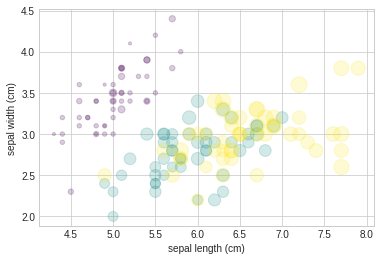

In [61]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
print(iris.data[20:22])
print(features[:,20:22])
# print(iris.target)

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);
# 长宽坐标，大小为散点半径，类别用颜色表示
# 明显大数据plt.plot性能高于scatter

# 误差可视化
基础误差条：errorbar  
连续误差：没有內建的函数，可通过plt.plot和plt.fill_between函数结合(见下高斯回归过程)

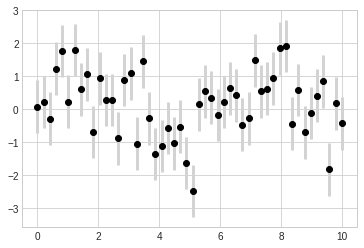

In [63]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

# plt.errorbar(x, y, yerr=dy, fmt='.k');  # fmt参数控制线条和点风格
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);
# 可指定水平方向误差条（xerr），单边误差条和其他参数

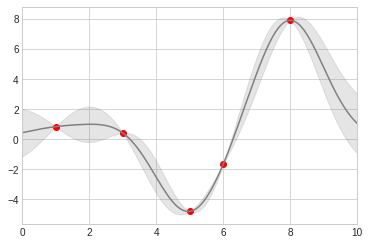

In [65]:
from sklearn.gaussian_process import GaussianProcessRegressor

# 定义模型和一些符合模型的点
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 计算高斯过程回归，使其符合 fit 数据点
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * std  # 两倍sigma ~ 95% 确定区域

# 可视化结果
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

# 密度和轮廓 
plt.contour(X, Y, Z, 20, cmap='RdGy');

# 直方图，分桶和密度

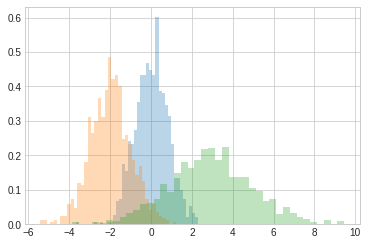

In [67]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);
# counts, bin_edges = np.histogram(data, bins=5)

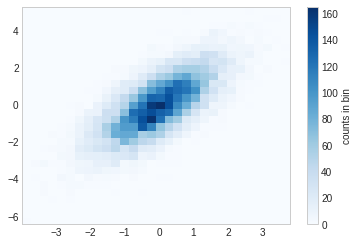

In [72]:
# 二维直方图和分桶
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
# counts, xedges, yedges = np.histogram2d(x, y, bins=30)

# 自定义颜色条
颜色条可以通过cmap参数指定使用的色谱系统（或叫色图）plt.cm模块，viridis，cubehelix，RdBu，jet     
要在 Python 中更加正规的使用颜色，可以查看 Seaborn 库的工具和文档。

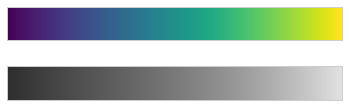

In [78]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """返回给定色图的灰度版本"""
    cmap = plt.cm.get_cmap(cmap) # 使用名称获取色图对象
    colors = cmap(np.arange(cmap.N)) # 将色图对象转为RGBA矩阵，形状为N×4

    # 将RGBA颜色转换为灰度
    # 参考 http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114] # RGB三色的权重值
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight)) # RGB平方值和权重的点积开平方根
    colors[:, :3] = luminance[:, np.newaxis] # 得到灰度值矩阵
    # 返回相应的灰度值色图
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)


def view_colormap(cmap):
    """将色图对应的灰度版本绘制出来"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

# view_colormap('jet')    # 出现了不规则的亮条纹
view_colormap('viridis')    # Matplotlib 2.0 后默认色图，彩色和灰度均变化均匀
# view_colormap('cubehelix')    # 彩色方案
# view_colormap('RdBu')    # 有正负分布数据集，双色颜色条

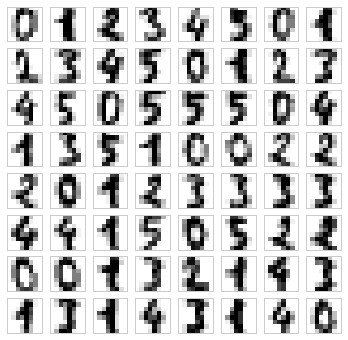

In [73]:
# 读取数字0-5的手写图像，然后使用Matplotlib展示头64张缩略图，每张图8*8维度
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')  # cmap 色图
    axi.set(xticks=[], yticks=[])

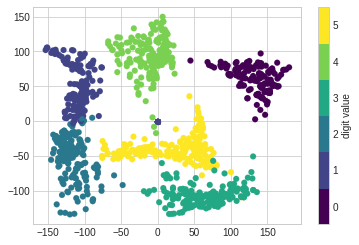

In [81]:
# 使用Isomap将手写数字图像映射到二维流形学习中
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

# 绘制图表结果
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('viridis', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

# 子图表
面向对象：  
fig.add_axes  
plt.subplots：一句代码设置所有网格子图表  
plt.GridSpec：更复杂的排列

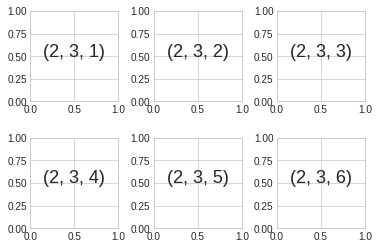

In [82]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

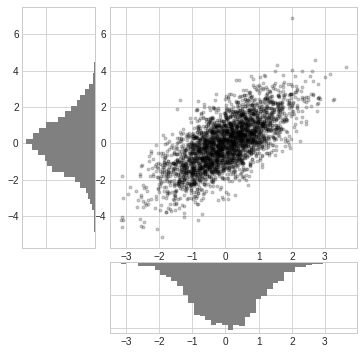

In [83]:
# 构建二维正态分布数据
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 使用GridSpec创建网格并加入子图表
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 在主图表中绘制散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 分别在x轴和y轴方向绘制直方图
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis() # x轴方向（右下）直方图倒转y轴方向

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis() # y轴方向（左上）直方图倒转x轴方向

# 箭头和标注
plt.annotate()

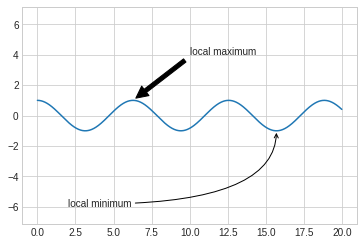

In [84]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

In [86]:
# 刻度
# fig, ax = plt.subplots(5, 5, figsize=(5, 5))
# fig.subplots_adjust(hspace=0, wspace=0)

# # 从scikit-learn载入头像数据集
# from sklearn.datasets import fetch_olivetti_faces
# faces = fetch_olivetti_faces().images

# for i in range(5):
#     for j in range(5):
#         ax[i, j].xaxis.set_major_locator(plt.NullLocator())
#         ax[i, j].yaxis.set_major_locator(plt.NullLocator())
#         ax[i, j].imshow(faces[10 * i + j], cmap="bone")

# 三维数据
Matplotlib 最开始被设计为仅支持二维的图表。到 1.0 版本发布左右，一些三维图表的工具在二维展示的基础上被创建了出来，结果就是  
Matplotlib 提供了一个方便的（同时也是有限的）的可用于三维数据可视化的一套工具。三维图表可以使用载入mplot3d工具包来激活。

In [96]:
%matplotlib notebook
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

# 三维螺旋线的数据
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# 三维散点的数据
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>